In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm

In [22]:
# def plot(self):
#     plt.figure(figsize=(12, 8))
#     ax = plt.axes(projection='3d')
    
#     ax.scatter3D(self.X_train[:, 0, self.X_train[:, 1]],
#                  self.sigmoid(self.X_train.dot(self.w))
#                 )

In [43]:
class LogisticRegression:
    
    
    def __init__(self, learningRate, tolerance, maxIteration = 1000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
        
    def datasetReader(self):    
        train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')
        
        train_df, test_df = np.array(train_df, dtype = np.float64), np.array(test_df, dtype = np.float64)
        
        # Function to remove bad points
        
        
        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]
        
        return X_train, X_test, y_train, y_test
    
    
    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0], 1), X])
    
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def costFunction(self, X, y):
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) # Neg Log Likelihood
        cost = pred_.sum()
        
        return cost
    
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad
        
        
    def gradientDescent(self, X, y):
        cost_sequences = []
        
        last_cost = float('inf')
        
        for i in tqdm.tqdm(range(self.maxIteration)):
        
            self.w = self.w - self.learningRate * self.gradient(X, y)
            
            cur_cost = self.costFunction(X, y)
            diff = last_cost - cur_cost
            
            last_cost = cur_cost
            
            cost_sequences.append(cur_cost)
            
            if diff < self.tolerance:
                print("The model stopped - Converged")
                break
                
            
        #self.plot_cost(cost_sequences)
        self.plotCost(cost_sequences)
        
        
        return 
    
    
    def predict(self, X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, precision, recall
    
    
    def runModel(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.datasetReader()
        
        print("Solving using gradient descent")
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        print(self.w)
        
        y_hat_train = self.predict(self.X_train)
        
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)
        
        print("Evaluation for training data: \n")
        print("Accuracy: ", accuracy)
        print("Precision: ", precision)
        print("Recall: ", recall)
        
        
        
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        
        fix, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel = 'Number of iterations',
               ylabel = 'Error Value'
              )
        
        

In [44]:
lr = LogisticRegression(tolerance=0.0, learningRate = 0.1e-5, maxIteration=100000)

  5%|▍         | 4534/100000 [00:00<00:02, 45333.67it/s]

Solving using gradient descent


100%|██████████| 100000/100000 [00:01<00:00, 60511.15it/s]


[-0.53977559  0.26130952]
Evaluation for training data: 

Accuracy:  0.9565217391304348
Precision:  0.9722222222222222
Recall:  0.9722222222222222


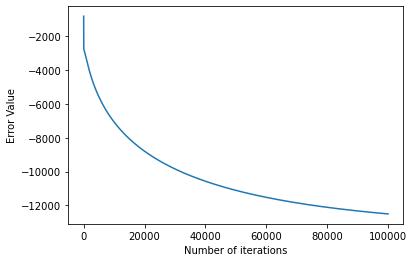

In [45]:
lr.runModel()